In [1]:
import bagpy
from bagpy import bagreader
import matplotlib.pyplot as plt
import pandas as pd

/home/safwan/virenv/base3.8/lib/python3.8/site-packages/bagpy/bagreader.py:121: UserWarning: There is a newer version of bagpy available on PyPI:

Your version: 	
0.4.5
Latest version: 	
0.4.6
Consider updating it by using command pip install --upgrade bagpy
  warnings.warn("{}\n{}\n{}\n{}\n{}\n{}".format(


In [2]:
filepath = '/home/safwan/Documents/shared_files/cyverse/2T3MWRFVXLW056972/bagfiles/2021_07_06/2021_07_06_20_53_22_2T3MWRFVXLW056972_cmd_-3.0.bag'
b = bagreader(filepath)
filename = filepath.split("/")[-1]

[INFO]  Successfully created the data folder /home/safwan/Documents/shared_files/cyverse/2T3MWRFVXLW056972/bagfiles/2021_07_06/2021_07_06_20_53_22_2T3MWRFVXLW056972_cmd_-3.0.


In [3]:
b.topic_table

,Topics,Types,Message Count,Frequency
0,/commands,std_msgs/Float64,758,100.050188
1,/highbeams,geometry_msgs/Twist,8,1.000165
2,/rosout,rosgraph_msgs/Log,9,9765.550640
3,/rosout_agg,rosgraph_msgs/Log,6,12409.183432
4,/timed_accel,std_msgs/Float64,69,9.984299
5,/track_a0,geometry_msgs/PointStamped,157,20.035176
6,/track_a1,geometry_msgs/PointStamped,157,20.017439
7,/track_a10,geometry_msgs/PointStamped,154,19.970879
8,/track_a11,geometry_msgs/PointStamped,154,19.944100
9,/track_a12,geometry_msgs/PointStamped,154,20.043314


In [19]:
CMD_ACC_MSG = b.message_by_topic('/commands')
ACC_MSG = b.message_by_topic('/vehicle/accel')
GHOST_VEL_MSG = b.message_by_topic('/ghost/vehicle/vel')
VEL_MSG = b.message_by_topic('/vehicle/vel')

In [20]:
df_cacc = pd.read_csv(CMD_ACC_MSG)
df_acc = pd.read_csv(ACC_MSG)
df_gvel = pd.read_csv(GHOST_VEL_MSG)
df_vel = pd.read_csv(VEL_MSG)
t0 = df_gvel['Time'][0]

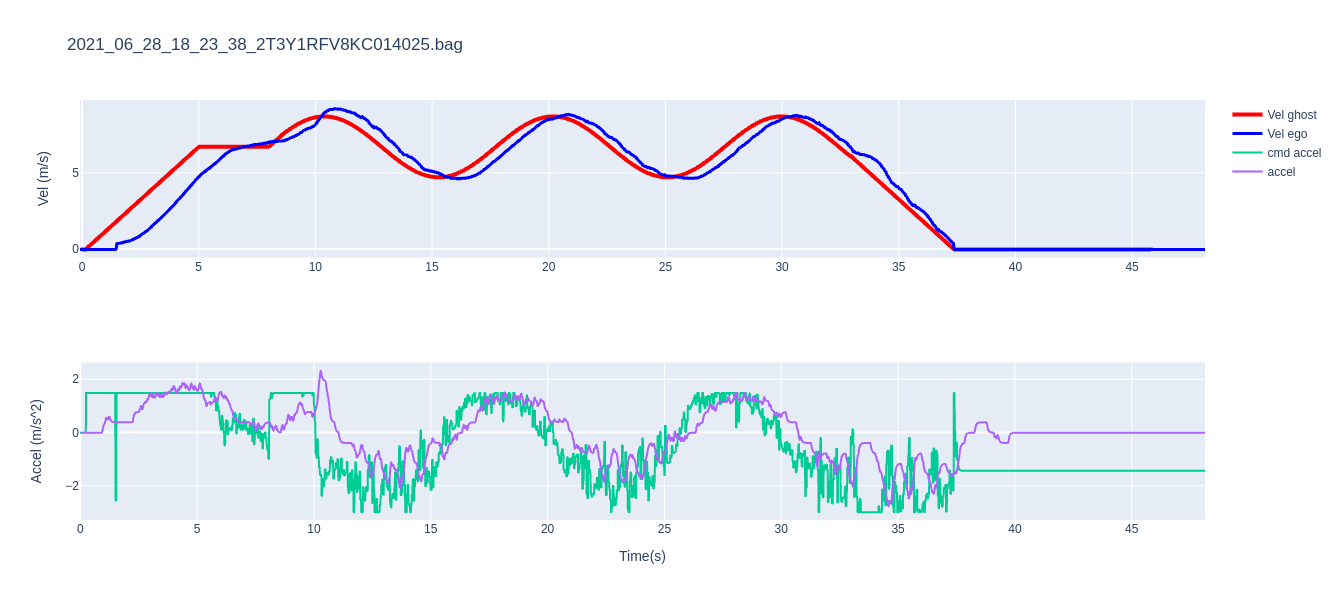

In [21]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
figr = make_subplots(rows=2, cols=1, subplot_titles=("", ""))

figr.append_trace(go.Scattergl(
    x=df_gvel['Time']-t0,
    y=df_gvel['twist.linear.x'],
     name="Vel ghost",
      line=dict(
        width=4,
          color="red",
     ),
), row=1, col=1)
figr.append_trace(go.Scattergl(
    x=df_vel['Time']-t0,
    y=df_vel['twist.linear.x'],
          line=dict(
        width=3,
          color="blue",
     ),
    name="Vel ego",
), row=1, col=1)


figr.append_trace(go.Scattergl(
    x=df_cacc['Time']-t0, 
#     y=speed_msg2["twist.linear.x"],
    y=df_cacc['data'],
       mode='lines',
          marker=dict(
            size=5,
          ),
    name="cmd accel",
), row=2, col=1)
figr.append_trace(go.Scattergl(
    x=df_acc['Time']-t0, 
#     y=speed_msg2["twist.linear.x"],
    y=df_acc['accel.linear.x'],
       mode='lines',
          marker=dict(
            size=5,
          ),
    name="accel",
), row=2, col=1)

figr.update_xaxes(title_text="Time(s)", row=2, col=1)

figr.update_yaxes(title_text="Vel (m/s)", row=1, col=1)
figr.update_yaxes(title_text="Accel (m/s^2)", row=2, col=1)



figr.update_layout(height=600, width=800, title_text=filename)
figr.show()